In [2]:
## Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
## Reading the data
df = pd.read_csv("./Data/train.csv")

In [4]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
## Dropping the selected_text column as the test set does not contain those values. It would be better to remove those columns which are not needed
df.drop(['selected_text'], axis=1, inplace=True)

In [6]:
# lets check our data head
df.head()                                     # As we can see here the selected_text column has been removed and we are only left with the actual text values along with their sentiments.

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


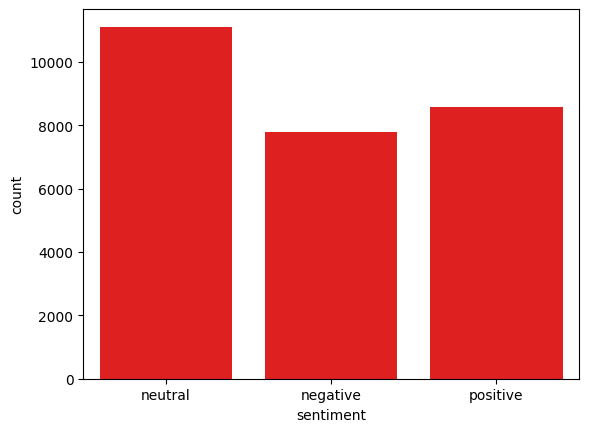

In [7]:
## CountPlot of sentiments
sns.countplot(data=df, x='sentiment', color='red')
plt.show()

#### From the above plot we can see that there seems to be more neutral sentiments in the text as compared to positive and negative sentiments.

In [8]:
# Lets look at the shape of the data
df.shape

(27481, 3)

In [9]:
## Read some few lines of the text
df['text'].iloc[3]

' what interview! leave me alone'

In [10]:
## Lets check the length of the selected text or any text
len(df['text'].iloc[3])

31

In [11]:
df['text'].head()

0                  I`d have responded, if I were going
1        Sooo SAD I will miss you here in San Diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     Sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

In [12]:
## Checking the Data info (null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27481 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27481 non-null  object
dtypes: object(3)
memory usage: 644.2+ KB


#### Looking at the data info, we can see that almost all the values present in the dataset are not null except few texts.

In [13]:
# removing null values
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27480 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27480 non-null  object
dtypes: object(3)
memory usage: 858.8+ KB


#### We have removed all the null values present in the dataset

In [15]:
## creating a new column for text_length
df['text_length'] = df['text'].apply(lambda x: len(x))

In [16]:
df.head()

,textID,text,sentiment,text_length
0,cb774db0d1,"I`d have responded, if I were going",neutral,36
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46
2,088c60f138,my boss is bullying me...,negative,25
3,9642c003ef,what interview! leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75


In [17]:
## Creating a new column for total no of words present in the text (text_words)

df['text_words'] = df['text'].apply(lambda x: len(x.split()))

In [18]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [19]:
## Taking seperate dataframes for different sentiments (positive, neutral, negative)
positive_df = df[df['sentiment'] == 'positive']
neutral_df = df[df['sentiment'] == 'neutral']
negative_df = df[df['sentiment'] == 'negative']

In [20]:
print("The shape of the dataframe that contains only the positive reviews is: {}".format(positive_df.shape))
print("The shape of the dataframe that contains only the neutral reviews is: {}".format(neutral_df.shape))
print("The shape of the dataframe that contains only the negative reviews is: {}".format(negative_df.shape))

The shape of the dataframe that contains only the positive reviews is: (8582, 5)
The shape of the dataframe that contains only the neutral reviews is: (11117, 5)
The shape of the dataframe that contains only the negative reviews is: (7781, 5)


In [21]:
positive_df.head()

,textID,text,sentiment,text_length,text_words
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,64,14
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive,69,10
11,16fab9f95b,I really really like the song Love Story by Ta...,positive,56,11
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,positive,135,24
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...",positive,51,11


In [22]:
# Creating a list just for positive texts
positive_text = []
for i in range(len(positive_df)):
    positive_text.append(positive_df['text'].iloc[i])

In [23]:
positive_text[: 5]

['2am feedings for the baby are fun when he is all smiles and coos',
 ' Journey!? Wow... u just became cooler.  hehe... (is that possible!?)',
 'I really really like the song Love Story by Taylor Swift',
 'Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job.  Can`t wait to have a dragon pet',
 'the free fillin` app on my ipod is fun, im addicted']

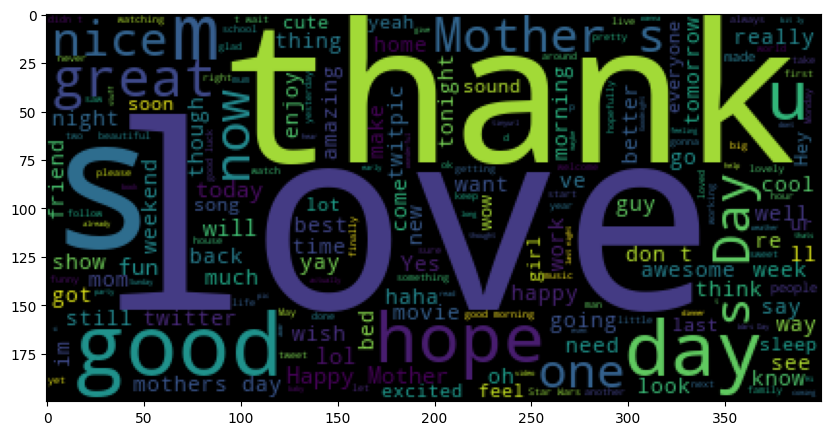

In [24]:
## Positive Text WordCloud
wordcloud = WordCloud(stopwords = STOPWORDS)
wordcloud.generate(''.join(positive_text))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.show(wordcloud)


#### WordCloud gives us a good idea about the number of repeating words by the size. We can see that the words with bigger size such as Love, thank, good which make up most of the positive words.there are few words which occurs very rare such as 'awesome' but these words also makes a mark in the decisions respectively. In addition to this we can also see that there are few words which are negative in the positive text. therefore we can conclude that words are a good indication of the polarity and sentiments of the image.

In [25]:
## Creating a List for negative texts
negative_text = []
for i in range(len(negative_df)):
    negative_text.append(negative_df['text'].iloc[i])

In [26]:
negative_text[:3]

[' Sooo SAD I will miss you here in San Diego!!!',
 'my boss is bullying me...',
 ' what interview! leave me alone']

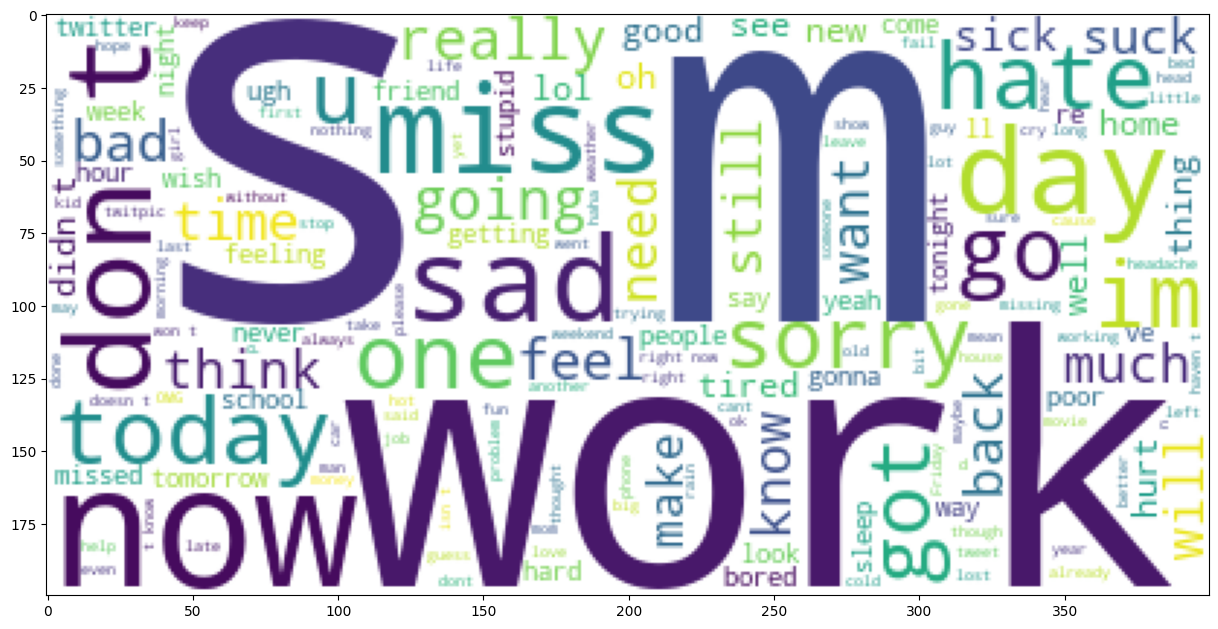

In [27]:
## negative Text WordCloud
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white')
wordcloud.generate(''.join(negative_text))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.show()

#### As we can see from the WordCloud that there are some words such as 'miss', 'No' which are basically considered to be negative. In addition we can also see few words such as 'work', 'sorry' that also tend to be negative.

In [28]:
## lets check our positive and negative Data frame
positive_df.head()

,textID,text,sentiment,text_length,text_words
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,64,14
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive,69,10
11,16fab9f95b,I really really like the song Love Story by Ta...,positive,56,11
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,positive,135,24
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...",positive,51,11


In [29]:
negative_df.head()

,textID,text,sentiment,text_length,text_words
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14
12,74a76f6e0a,My Sharpie is running DANGERously low on ink,negative,44,8


In [30]:
### List of StopWords
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
stopwords = nltk.corpus.stopwords.words('english')

In [32]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [33]:
df.drop(['textID'], axis=1, inplace=True)   ## We don't need text_id column

In [34]:
df.head()

,text,sentiment,text_length,text_words
0,"I`d have responded, if I were going",neutral,36,7
1,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,my boss is bullying me...,negative,25,5
3,what interview! leave me alone,negative,31,5
4,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [35]:
# Feature Selection
X = df.drop(['sentiment'], axis=1)
y = df['sentiment']

In [36]:
### Dividing the data into training and cross validation data

## here we gonna be dividing data into training and cross validation data and ensure that we undrstand the machine learning model well.We are going to be dividing the data into 2 parts where 70% of the data is taken as the training data and the 30 percent of the data would be taken as the test data

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state=50)

In [37]:
X_train.shape

(19236, 3)

In [38]:
X_cv.shape

(8244, 3)

In [39]:
## Creating a function to relplace words
import re

## Specific
def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
## General
    phrase = re.sub(r"n\'t", "not", phrase)
    phrase = re.sub(r"\'re", "are", phrase)
    phrase = re.sub(r"\'s", "is", phrase)
    phrase = re.sub(r"\'d", "would", phrase)
    phrase = re.sub(r"\'ll", "will", phrase)
    phrase = re.sub(r"\'t", "not", phrase)
    phrase = re.sub(r"\'ve", "have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase



In [40]:
# Example

decontracted("He won't be able to make it")

'He will not be able to make it'

In [41]:
from nltk.stem import PorterStemmer
import string
string.punctuation
ps = PorterStemmer()

In [42]:
## Text-Preprocessing
from tqdm import tqdm
import re

preprocessed_text = []
## tqdm is used for creating progress bars(visualizing the progress of loops or iterations)

for sentence in tqdm(X_train['text'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(word.lower() for word in sent.split() if word.lower() not in string.punctuation)
    tokens = sent.split()
    sent = [ps.stem(word) for word in tokens if word.lower() not in stopwords]
    preprocessed_text.append(' '.join(sent))


100%|██████████| 19236/19236 [00:05<00:00, 3578.20it/s]


In [43]:
preprocessed_text[0:5]

['24 hour sinc dog put sleep rip old friend',
 'feel comfort today',
 'hurray twin girl born beauti may day',
 'bah h8 wake',
 'textmat crash first time 3 month bad actual textmat']

In [44]:
X_train['text'] = preprocessed_text             #It will assign preprocessed_text data stored in preprocessed_text to the entire text column for the X_train Dataframe

In [45]:
X_train.head()

,text,text_length,text_words
19832,24 hour sinc dog put sleep rip old friend,78,18
10340,feel comfort today,41,6
11044,hurray twin girl born beauti may day,48,9
14088,bah h8 wake,19,5
20333,textmat crash first time 3 month bad actual te...,80,14


In [46]:
X_cv.head()

,text,text_length,text_words
7214,My mom was happy with my present yayy,38,8
19840,No surprise there. They probably don`t know t...,67,11
19409,"nope difference of 5 OMR for C class, anyone ...",102,19
6600,It smells badly of garlic,25,5
7807,Friday has a whole different meaning when you ...,78,14


In [47]:
## Using LabelBinarizer we can convert categorical label(sentiments) into binary representation

binarizer = LabelBinarizer()
y_train_new = binarizer.fit_transform(y_train)

y_cv_new = binarizer.transform(y_cv)

In [48]:
y_cv_new

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [49]:
y_train_new 

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [50]:
### tfidf Vectorizer - with the help of tfidf vectorizer it is easy to convert the text into the form of vector based on the word frequency and the inverse document frequency which could be fed to machine learning models for prediction purposes.

vectorizer = TfidfVectorizer()
X_train_text = vectorizer.fit_transform(X_train['text'])
X_cv_text = vectorizer.transform(X_cv['text'])

In [51]:
X_train_text.shape

(19236, 16769)

In [52]:
X_train_text[0:5]

<5x16769 sparse matrix of type '<class 'numpy.float64'>'
	with 29 stored elements in Compressed Sparse Row format>

In [53]:
## Neural Network Model for Prediction
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape=(16769,)))                   ## 100 = total no. of neurons
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [54]:
to_categorical(np.arange(1,10))

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [55]:
y_train

19832    negative
10340    negative
11044    positive
14088    negative
20333     neutral
           ...   
15650    positive
22638    positive
10124    positive
5601     positive
14001    negative
Name: sentiment, Length: 19236, dtype: object

In [56]:
## We gonna convert the output values in a series format so that we can give these values to the neural network model

encoder = LabelEncoder()

y_train_new = encoder.fit_transform(y_train)

In [57]:
y_train_new

array([0, 0, 2, ..., 2, 2, 0])

In [58]:
y_train_final = to_categorical(y_train_new)

In [59]:
y_train_final

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [60]:
X_train.head()

,text,text_length,text_words
19832,24 hour sinc dog put sleep rip old friend,78,18
10340,feel comfort today,41,6
11044,hurray twin girl born beauti may day,48,9
14088,bah h8 wake,19,5
20333,textmat crash first time 3 month bad actual te...,80,14


In [61]:
X_train_dropped = X_train.drop(['text'], axis=1)

In [62]:
X_train.head()

,text,text_length,text_words
19832,24 hour sinc dog put sleep rip old friend,78,18
10340,feel comfort today,41,6
11044,hurray twin girl born beauti may day,48,9
14088,bah h8 wake,19,5
20333,textmat crash first time 3 month bad actual te...,80,14


In [63]:
X_train_dropped.head()

,text_length,text_words
19832,78,18
10340,41,6
11044,48,9
14088,19,5
20333,80,14


In [64]:
X_cv.head()

,text,text_length,text_words
7214,My mom was happy with my present yayy,38,8
19840,No surprise there. They probably don`t know t...,67,11
19409,"nope difference of 5 OMR for C class, anyone ...",102,19
6600,It smells badly of garlic,25,5
7807,Friday has a whole different meaning when you ...,78,14


In [65]:
X_cv_dropped = X_cv.drop(['text'], axis=1)

In [66]:
X_cv.head()

,text,text_length,text_words
7214,My mom was happy with my present yayy,38,8
19840,No surprise there. They probably don`t know t...,67,11
19409,"nope difference of 5 OMR for C class, anyone ...",102,19
6600,It smells badly of garlic,25,5
7807,Friday has a whole different meaning when you ...,78,14


In [67]:
X_cv_dropped.head()

,text_length,text_words
7214,38,8
19840,67,11
19409,102,19
6600,25,5
7807,78,14


In [68]:
### Scaling the data

scaler = MinMaxScaler()
X_train_final = scaler.fit_transform(X_train_dropped)
X_cv_final = scaler.transform(X_cv_dropped)


In [69]:
X_train_final[0:5]

array([[0.54347826, 0.5483871 ],
       [0.27536232, 0.16129032],
       [0.32608696, 0.25806452],
       [0.11594203, 0.12903226],
       [0.55797101, 0.41935484]])

In [70]:
X_cv_final[0:5]

array([[0.25362319, 0.22580645],
       [0.46376812, 0.32258065],
       [0.7173913 , 0.58064516],
       [0.15942029, 0.12903226],
       [0.54347826, 0.41935484]])

In [71]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

y_cv_encoded = encoder.transform(y_cv)

In [72]:
y_train_final = to_categorical(y_train_encoded)

y_cv_final = to_categorical(y_cv_encoded)

In [73]:
y_train_final[0:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [74]:
y_cv_final[0:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [75]:
X_train_final[0:5]

array([[0.54347826, 0.5483871 ],
       [0.27536232, 0.16129032],
       [0.32608696, 0.25806452],
       [0.11594203, 0.12903226],
       [0.55797101, 0.41935484]])

In [76]:
X_cv_final[0:5]

array([[0.25362319, 0.22580645],
       [0.46376812, 0.32258065],
       [0.7173913 , 0.58064516],
       [0.15942029, 0.12903226],
       [0.54347826, 0.41935484]])

In [77]:
X_train.head()

,text,text_length,text_words
19832,24 hour sinc dog put sleep rip old friend,78,18
10340,feel comfort today,41,6
11044,hurray twin girl born beauti may day,48,9
14088,bah h8 wake,19,5
20333,textmat crash first time 3 month bad actual te...,80,14


In [97]:
### Using another Bag of Words method to understand the text

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['text'])
X_cv_vectorized = vectorizer.transform(X_cv['text'])

In [99]:
X_train_vectorized

<19236x16769 sparse matrix of type '<class 'numpy.int64'>'
	with 133132 stored elements in Compressed Sparse Row format>

In [98]:
X_cv_vectorized

<8244x16769 sparse matrix of type '<class 'numpy.int64'>'
	with 45915 stored elements in Compressed Sparse Row format>

In [84]:
X_train_final[0:5]

array([[0.54347826, 0.5483871 ],
       [0.27536232, 0.16129032],
       [0.32608696, 0.25806452],
       [0.11594203, 0.12903226],
       [0.55797101, 0.41935484]])

In [85]:
## Since the above values are not in the form of arrays and in the form of sparse matrix, it would be good if we convert the values into the form of arrays to ease the machine learning predictions

In [100]:
X_train_bow_toarray = X_train_vectorized.toarray()
X_cv_bow_toarray = X_cv_vectorized.toarray()


In [101]:
X_train_n = np.concatenate((X_train_bow_toarray, X_train_final), axis=1)

X_cv_n = np.concatenate((X_cv_bow_toarray, X_cv_final), axis=1)

In [102]:
X_train_n

array([[0.        , 0.        , 0.        , ..., 0.        , 0.54347826,
        0.5483871 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.27536232,
        0.16129032],
       [0.        , 0.        , 0.        , ..., 0.        , 0.32608696,
        0.25806452],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.66666667,
        0.5483871 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.21014493,
        0.12903226],
       [0.        , 0.        , 0.        , ..., 0.        , 0.50724638,
        0.35483871]])

In [103]:
X_cv_n

array([[0.        , 0.        , 0.        , ..., 0.        , 0.25362319,
        0.22580645],
       [0.        , 0.        , 0.        , ..., 0.        , 0.46376812,
        0.32258065],
       [0.        , 0.        , 0.        , ..., 0.        , 0.7173913 ,
        0.58064516],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.36956522,
        0.29032258],
       [0.        , 0.        , 0.        , ..., 0.        , 0.29710145,
        0.22580645],
       [0.        , 0.        , 0.        , ..., 0.        , 0.1884058 ,
        0.12903226]])

In [106]:
## Neural Network Model
## we will now use deep neural networks to ensure that we are getting best predictions respectively. We would start with 100 neurons for the first layer and followed by 25 neurons in the seconf layer and 10 in the third layer followed by the 3 final layers

model = Sequential()
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer='adam')

In [107]:
model.fit(X_train_n, y_train_final, epochs= 10, validation_data = (X_cv_n, y_cv_final))

Epoch 1/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.4635 - loss: 1.0164 - val_accuracy: 0.5941 - val_loss: 0.8890
Epoch 2/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6977 - loss: 0.7360 - val_accuracy: 0.5963 - val_loss: 0.9019
Epoch 3/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.7819 - loss: 0.5524 - val_accuracy: 0.5909 - val_loss: 0.9463
Epoch 4/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.8535 - loss: 0.4269 - val_accuracy: 0.5752 - val_loss: 1.0887
Epoch 5/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8813 - loss: 0.3430 - val_accuracy: 0.5708 - val_loss: 1.2212
Epoch 6/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9106 - loss: 0.2790 - val_accuracy: 0.5647 - val_loss: 1.3979
Epoch 7/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9287 - loss: 0.2405 - val_accuracy: 0.5632 - val_loss: 1.5435
Epoch 8/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9411 - loss: 0.1951 - 

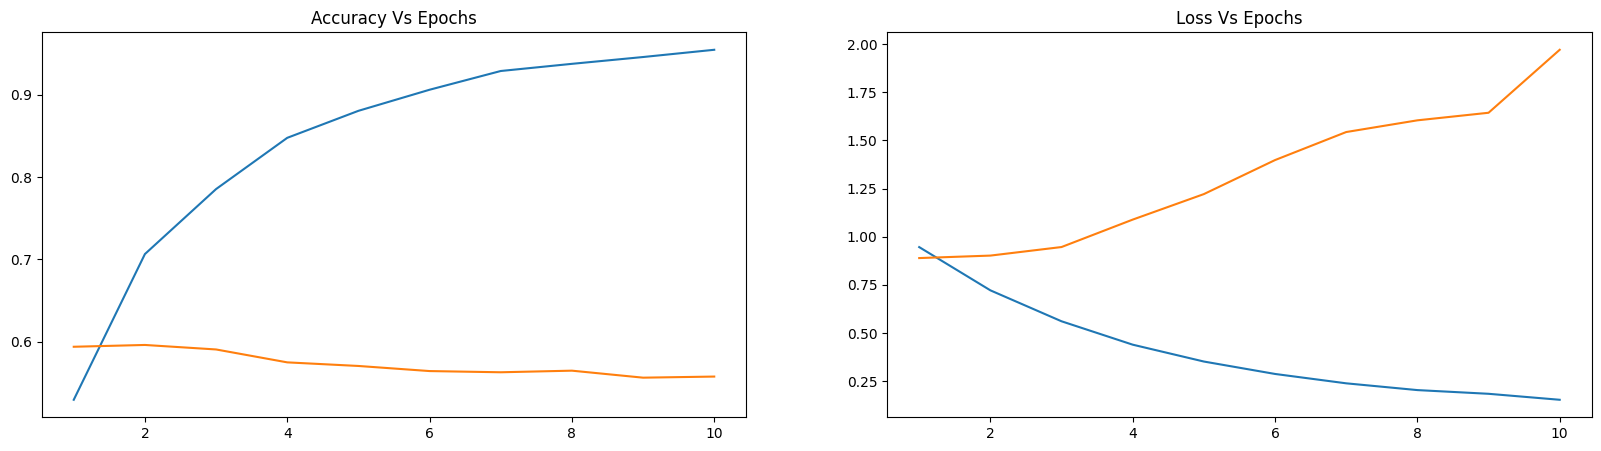

In [108]:
## Finally Plooting the results
## we will be looking at the deep neural network plots to see how the values of accuracy and loss change with respect to the number of epochs as the number of epochs increases the validation loss increases which syas that there might be overfitting although there is a decrease in training loss this gives us a clear indication that the model is overfitting after certain number of epochs are met.choosing the correct no. of epochs would reduce the overfitting

accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = np.arange(1, 11)
fig, ax = plt.subplots(1, 2, figsize=(20,5))

sns.lineplot(x= epochs, y=accuracy, ax=ax[0])
sns.lineplot(x=epochs, y=val_accuracy, ax=ax[0])
ax[0].set_title('Accuracy Vs Epochs')
sns.lineplot(x=epochs, y=loss, ax=ax[1])
sns.lineplot(x=epochs, y=val_loss, ax=ax[1])
ax[1].set_title('Loss Vs Epochs')
plt.show()